# Import the necessary packages

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk
import sqlite3 as sql
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr

# Creating SQLite Connections and Cursors

In [14]:
connection = sql.connect('../datasets and saved objs/database/olist.db');
cursor = connection.cursor();

# Load the CSV files with Pandas and Display the Information

In [15]:
dfCustomers = pd.read_csv('../datasets and saved objs/dataset/olist_customers_dataset.csv');
dfGeolocation = pd.read_csv('../datasets and saved objs/dataset/olist_geolocation_dataset.csv');
dfOrderItens = pd.read_csv('../datasets and saved objs/dataset/olist_order_items_dataset.csv');
dfOrderPayments = pd.read_csv('../datasets and saved objs/dataset/olist_order_payments_dataset.csv');
dfOrderReviews = pd.read_csv('../datasets and saved objs/dataset/olist_order_reviews_dataset.csv');
dfOrders = pd.read_csv('../datasets and saved objs/dataset/olist_orders_dataset.csv');
dfProducts = pd.read_csv('../datasets and saved objs/dataset/olist_products_dataset.csv');
dfSellers = pd.read_csv('../datasets and saved objs/dataset/olist_sellers_dataset.csv');
dfNameTranslation = pd.read_csv('../datasets and saved objs/dataset/product_category_name_translation.csv');


# Remove NaN elements from the dataframes
#dfCustomers.dropna(inplace=True);
#dfGeolocation.dropna(inplace=True);
#dfOrderItens.dropna(inplace=True);
#dfOrderPayments.dropna(inplace=True);
#dfOrderReviews.dropna(inplace=True);
#dfOrders.dropna(inplace=True);
#dfProducts.dropna(inplace=True);
#dfSellers.dropna(inplace=True);
#dfNameTranslation.dropna(inplace=True);



print("\n\n\tCustomers CSV Information: \n\n");
print(dfCustomers.info());
print("\n\n\tGeolocation CSV Information: \n\n");
print(dfGeolocation.info());
print("\n\n\tOrder Itens CSV Information: \n\n");
print(dfOrderItens.info());
print("\n\n\tOrders Payments CSV Information: \n\n");
print(dfOrderPayments.info());
print("\n\n\tOrder Reviews CSV Information: \n\n");
print(dfOrderReviews.info());
print("\n\n\tOrders CSV Information: \n\n");
print(dfOrders.info());
print("\n\n\tProducts CSV Information: \n\n");
print(dfProducts.info());
print("\n\n\tSelllers CSV Information: \n\n");
print(dfSellers.info());
print("\n\n\tName Translation CSV Information: \n\n");
print(dfNameTranslation.info());



	Customers CSV Information: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


	Geolocation CSV Information: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              10001

In [16]:
#print(dfCustomers.head(1))
#print(dfGeolocation.head(1))
#print(dfOrderItens.head(1))
#print(dfOrderPayments.head(1))
#print(dfOrderReviews.head(1))
#print(dfOrders.head(1))
#print(dfProducts.head(1))
#print(dfSellers.head(1))
#print(dfNameTranslation.head(1))
print(dfGeolocation.keys())

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [17]:
# get column names to create the database tables
customersColumns = list(dfCustomers.columns);
geolocationColumns = list(dfGeolocation.columns);
orderItensColumns = list(dfOrderItens.columns);
orderPaymentsColumns = list(dfOrderPayments.columns);
orderReviewsColumns = list(dfOrderReviews.columns);
ordersColumns = list(dfOrders.columns);
productsColumns = list(dfProducts.columns);
sellersColumns = list(dfSellers.columns);
nameTranslationColumns = list(dfNameTranslation.columns);

In [19]:
# creating tables
try:
    cursor.execute("create table customers (" +",".join(customersColumns) + ")");
    cursor.execute("create table geolocation (" +",".join(geolocationColumns) + ")");
    cursor.execute("create table orderItens (" +",".join(orderItensColumns) + ")");
    cursor.execute("create table orderPayments (" +",".join(orderPaymentsColumns) + ")");
    cursor.execute("create table orderReviews (" +",".join(orderReviewsColumns) + ")");
    cursor.execute("create table orders (" +",".join(ordersColumns) + ")");
    cursor.execute("create table products (" +",".join(productsColumns) + ")");
    cursor.execute("create table sellers (" +",".join(sellersColumns) + ")");
    cursor.execute("create table nameTranslation (" +",".join(nameTranslationColumns) + ")");
    
    # Inserting the data into the tables
    for item in range(len(dfCustomers)):
        numColumns = "";
        for index in range(len(customersColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into customers values (" + numColumns + ")", dfCustomers.iloc[item]);
    
    
    for item in range(len(dfGeolocation)):
        numColumns = "";
        for index in range(len(geolocationColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into geolocation values (" + numColumns + ")", dfGeolocation.iloc[item]);

    
    for item in range(len(dfOrderItens)):
        numColumns = "";
        for index in range(len(orderItensColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into orderItens values (" + numColumns + ")", dfOrderItens.iloc[item]);
    
    for item in range(len(dfOrderPayments)):
        numColumns = "";
        for index in range(len(orderPaymentsColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into orderPayments values (" + numColumns + ")", dfOrderPayments.iloc[item]);

    
    for item in range(len(dfOrderReviews)):
        numColumns = "";
        for index in range(len(orderReviewsColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into orderReviews values (" + numColumns + ")", dfOrderReviews.iloc[item]);
    
    for item in range(len(dfOrders)):
        numColumns = "";
        for index in range(len(ordersColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into orders values (" + numColumns + ")", dfOrders.iloc[item]);
    
    for item in range(len(dfProducts)):
        numColumns = "";
        for index in range(len(productsColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into products values (" + numColumns + ")", dfProducts.iloc[item]);

    for item in range(len(dfSellers)):
        numColumns = "";
        for index in range(len(sellersColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into sellers values (" + numColumns + ")", dfSellers.iloc[item]);

    for item in range(len(dfNameTranslation)):
        numColumns = "";
        for index in range(len(nameTranslationColumns)-1):
            numColumns += '?,';
        numColumns += '?';
        cursor.execute("insert into nameTranslation values (" + numColumns + ")", dfNameTranslation.iloc[item]);

    connection.commit()
    
except:
    print("Table already exist")
    



<AxesSubplot:xlabel='geolocation_lng', ylabel='geolocation_lat'>

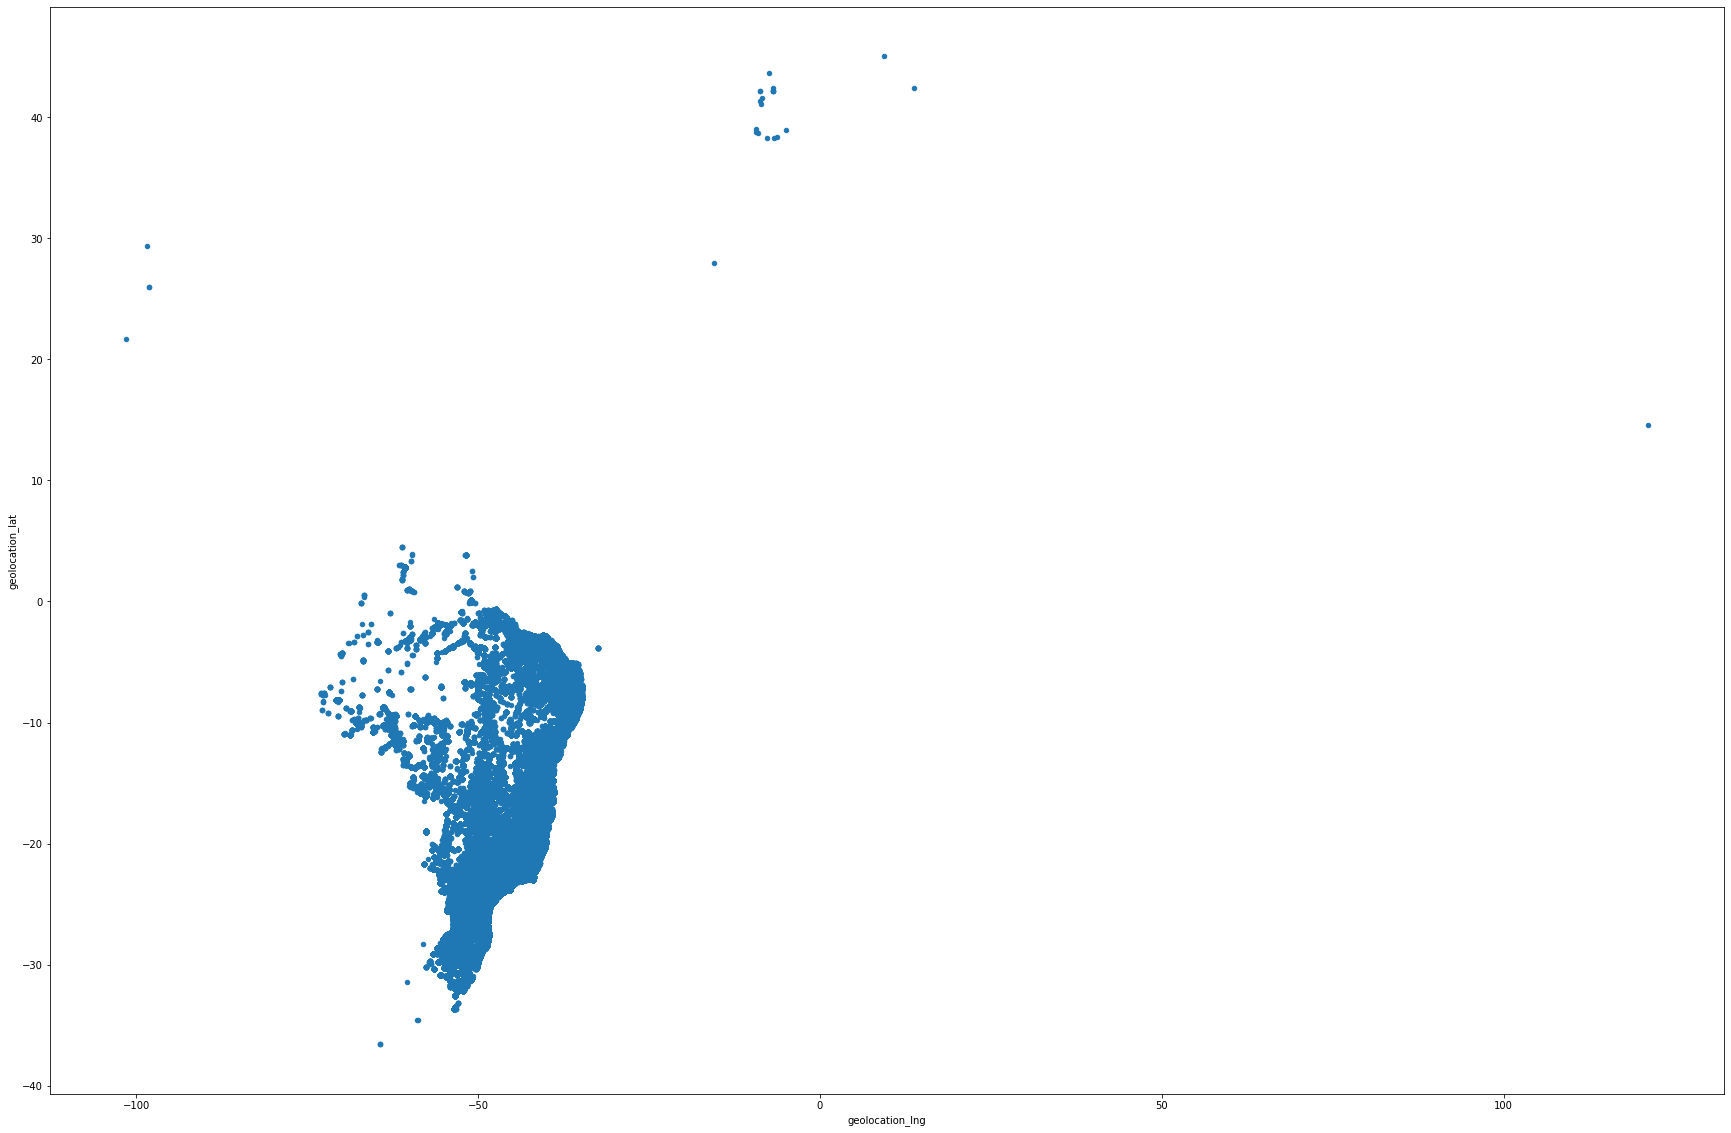

In [20]:
#dfCustomers.hist(bins=50,figsize=(20,15))
#dfGeolocation.hist(bins=50,figsize=(20,15));
#dfOrderItens.hist(bins=50,figsize=(20,15));
#dfOrderPayments.hist(bins=50,figsize=(20,15));
#dfOrderReviews.hist(bins=50,figsize=(20,15));
#dfOrders.hist(bins=50,figsize=(20,15));
#dfProducts.hist(bins=50,figsize=(20,15));
#dfSellers.hist(bins=50,figsize=(20,15));
#dfNameTranslation.hist(bins=50,figsize=(20,15));
#plt.show()

dfGeolocation.plot(kind="scatter", y="geolocation_lat", x="geolocation_lng",figsize=(30,20))

# How are users orders distributed across Brazil?

In [7]:
# This could be modelated as an unsupervised clustering problem 
# where we want to predict the probability of a specific order given a brazil region 

# How payments are distributed given the order value?

(array([-0.07222409507258104], dtype=object), 3.59602803307649e-120)


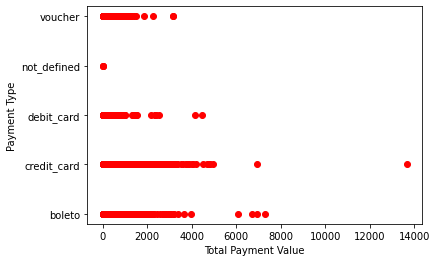

In [22]:
# This is a supervised learning problem, where we want to predict 
# the payment method given the total value of the order

columnPaymentType = dfOrderPayments['payment_type']
columnPaymentValues = dfOrderPayments['payment_value']

paymentTypeEncoder = OrdinalEncoder()

enconding_values = [[item] for item in columnPaymentType.unique()]
paymentTypeEncoder = paymentTypeEncoder.fit(enconding_values)

featurePayment = [[item] for item in columnPaymentType]
columnPaymentTypeEncoded = paymentTypeEncoder.fit_transform(featurePayment)

Y_ticks = [item[0] for item in paymentTypeEncoder.inverse_transform([[0],[1],[2],[3],[4]])]

plt.ylabel("Payment Type")
plt.xlabel("Total Payment Value")
plt.yticks(np.arange(5), Y_ticks)
#plt.xscale('log')
plt.plot(columnPaymentValues,columnPaymentTypeEncoded,'ro')
print(pearsonr(columnPaymentValues, columnPaymentTypeEncoded))

# Discussion 

This features are uncorrelated. The figure, however, shows three patterns:

1) payments between 6000 and 8000 are usually done with \"boleto\" or \"credit_card\" payment types

2) very high payments are usully done with \"credit_card\" payment type

3) "voucher" is usually used for payments below 2000

# What is the city distribution?

In [ ]:
columnState = dfGeolocation['geolocation_state']
columnCity =  dfGeolocation['geolocation_city']

cityEncoder = OrdinalEncoder()
stateEncoder = OrdinalEncoder()

enconding_city_values = [[item] for item in columnCity.unique()]
enconding_state_values = [[item] for item in columnState.unique()]

cityValuesEncoder = cityEncoder.fit(enconding_city_values)
stateValuesEncoder = stateEncoder.fit(enconding_state_values)

featureState = [[item] for item in columnState]
featureCity = [[item] for item in columnCity]

columnPaymentTypeEncoded = paymentTypeEncoder.fit_transform(featureState)

plt.hist(featureCity,bins=20)
plt.plot()

In [93]:
Nan_payments = [(columnPaymentValues[index],index) for index in range(len(columnPaymentValues)) if (columnPaymentType[index] == 'not_defined')]

#cursor.execute("select * from orderPayments where payment_type=:c", {'c':"debit_card"})
#debit_payments = cursor.fetchall()
print(max(Nan_payments))

(0.0, 94427)


# How vendors are distribueted among the country?

# Finalize the execution

In [12]:
connection.close();